In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math 
import pandas as pd

In [2]:

import timeit

start = timeit.timeit()
print("time")
end = timeit.timeit()
print(end - start)

time
0.0368849999995291


In [3]:
def laminar(R):
    return 64/(R)

In [4]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=laminar(Ra)
        D=laminar(Ra)
        E=laminar(Ra)
        F=laminar(Ra)
        G=laminar(Ra)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=laminar(Ra)
        D=laminar(Ra)
        E=laminar(Ra)
        F=laminar(Ra)
        G=laminar(Ra)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)*1.0/1000)

laminartime =(end - start)*1.0/1000


time
7.310000000870787e-08


In [5]:
import pandas as pd

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def clamond(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842*1.0/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamond(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f

def ClamondFluid(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f
    
def MethodRMS(R):
        difference=np.absolute(Fluidflowx(Ra,0.01,1)-ClamondFluid(Ra,0.01,1))
        rms=np.sum(difference[20000:100000-1])*1.0/len(difference[20000:100000-1])
        print(rms)
        return rms
    
MethodRMS(Ra)

lrms = MethodRMS(Ra)
    
timetest = [('Laminar',lrms, laminartime)]

dfObj = pd.DataFrame(timetest,
                     columns=['Method','RMS','Time'])
print(dfObj)

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


0.0
0.0
    Method  RMS          Time
0  Laminar  0.0  7.310000e-08


In [6]:
newDfObj = dfObj.append({'Method': 'Laminar',
                         'RMS':lrms,
                         'Time': laminartime
                        }, ignore_index=True)
print(newDfObj)

    Method  RMS          Time
0  Laminar  0.0  7.310000e-08
1  Laminar  0.0  7.310000e-08


In [7]:
def clamond(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamond(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f

def ClamondFluid(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f
    
def MethodRMS(R):
        difference=np.absolute(Fluidflowx(Ra,0.01,1)-ClamondFluid(Ra,0.01,1))
        rms=np.sum(difference[20000:100000-1])*1.0/len(difference[20000:100000-1])
        print(rms)
        return rms

In [8]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)*1.0/1000)

clamondtime =(end - start)*1.0/1000

rms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'DP Clamond',
                            'RMS':rms,
                            'Time': clamondtime}, ignore_index=True)




C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


time
4.9693999999362856e-06
0.0


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


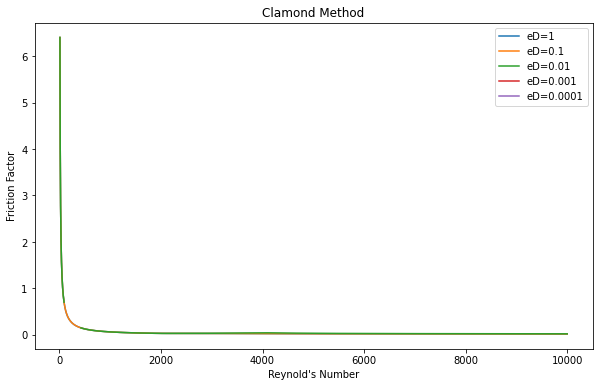

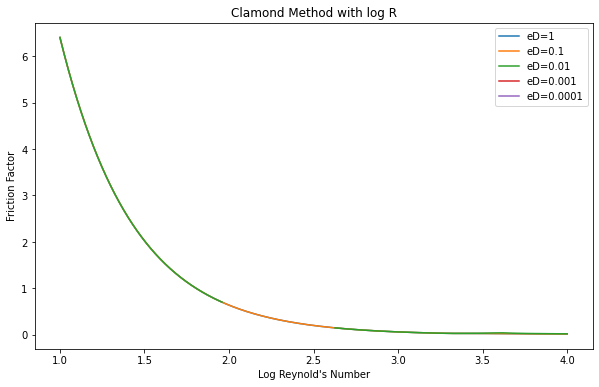

In [9]:
     
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)


plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Clamond Method')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Clamond Method with log R')
plt.legend()
plt.show()

In [10]:
def clamondsp(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842*1.0/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamondsp(X2,k,d)
    a=(2.0/5.0)*(T-L)*(X2-X1)**-3
    b=(3.0/2.0)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2.0+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamondsp(R,k,d)*((R > 4000))
        return f

In [11]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'SP. Clamond',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)



time
4.4549600000209466e-05
0.24052881252609462


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


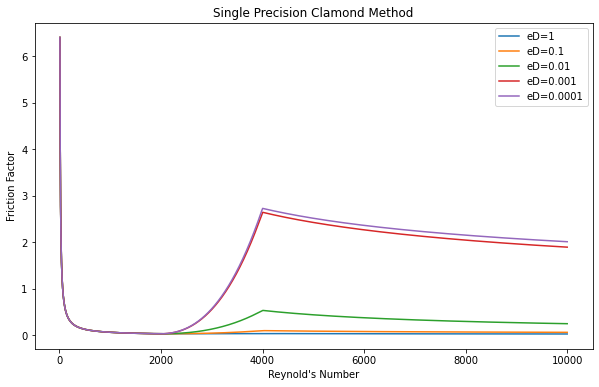

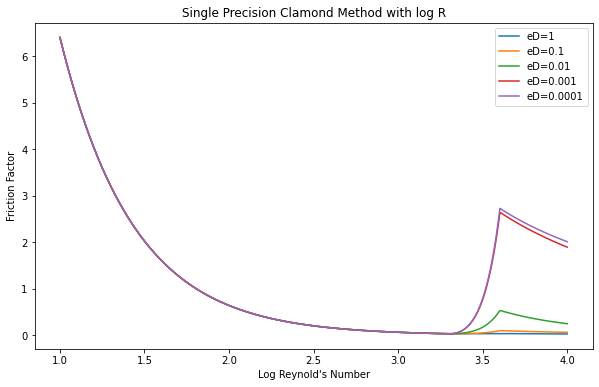

In [12]:
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)

plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Single Precision Clamond Method')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Single Precision Clamond Method with log R')
plt.legend()
plt.show()

In [16]:
def Shifrinson(R,k,d):
    eD=k/d
    f=0.11*(eD)**(0.25)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Shifrinson(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Shifrinson(R,k,d)*((R > 4000))
        return f


In [17]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1


def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Shifrinson',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
3.880139999819221e-05
0.005471374761399799


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


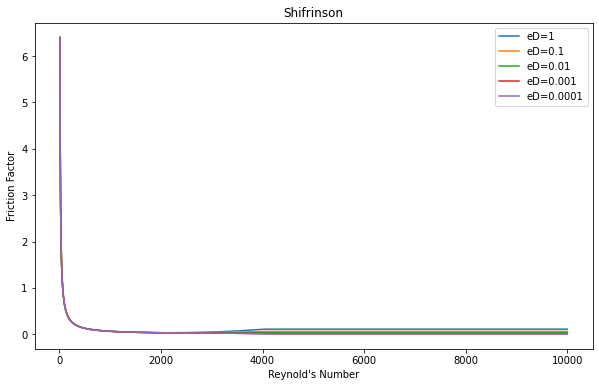

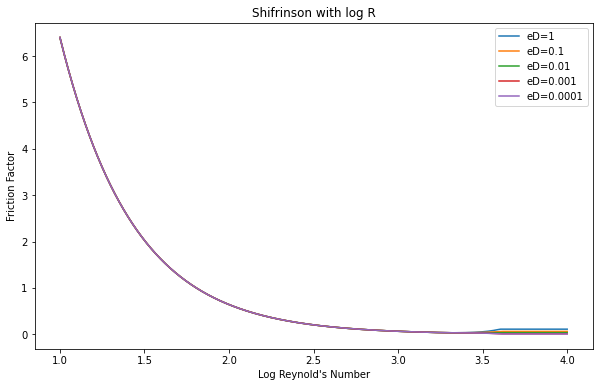

In [18]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Shifrinson')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Shifrinson with log R')
plt.legend()
plt.show()



In [24]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

In [25]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Birkić',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)

time
4.7339999946416356e-07
0.007153054850569416


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


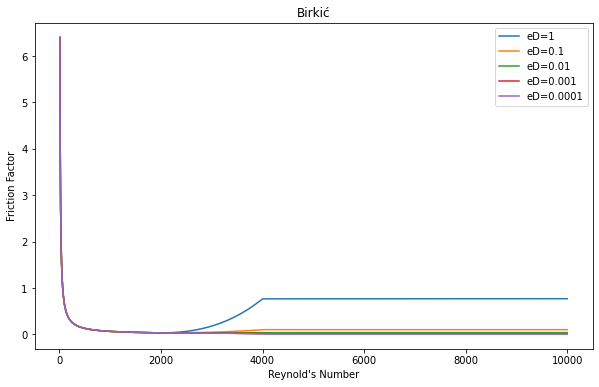

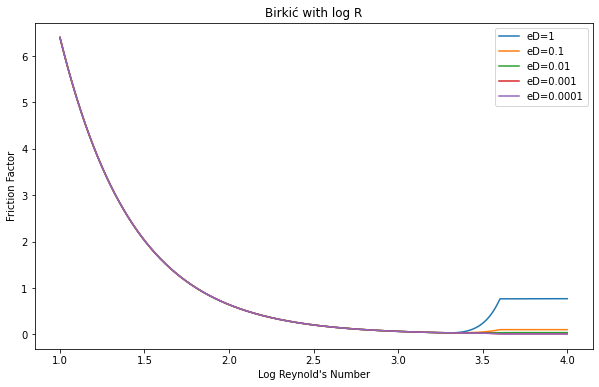

In [26]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Birkić')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Birkić with log R')
plt.legend()
plt.show()

In [27]:
def JainSwamee(R,k,d):
    eD=k/d
    f=-2*np.log10((eD/(3715))+(5.74/(R)**0.9))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=JainSwamee(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+JainSwamee(R,k,d)*((R > 4000))
        return f

In [28]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'JainSwamee',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-1.4879999980621504e-07
0.004564960897991576


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


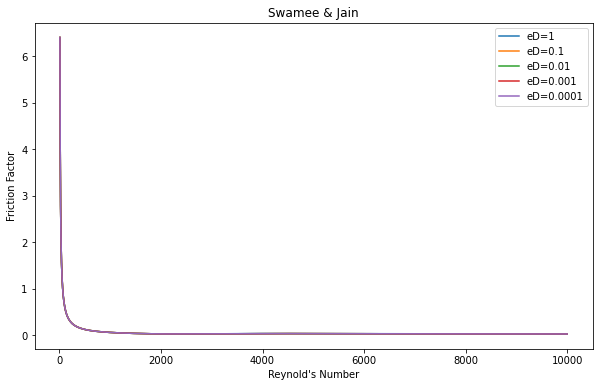

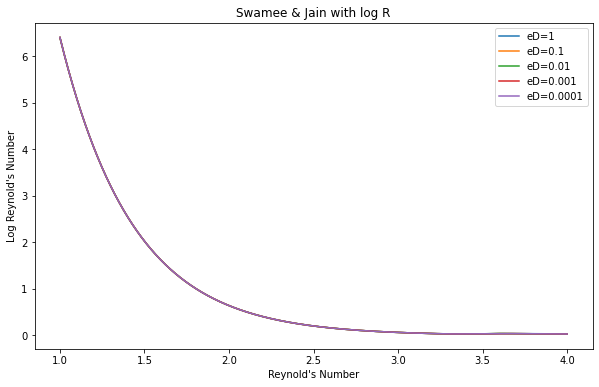

In [29]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
       

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Swamee & Jain')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Log Reynold's Number")
plt.title('Swamee & Jain with log R')
plt.legend()
plt.show()
                      


In [30]:
def Serghides1(R,k,d):
    eD=k/d
    psi1=-2*np.log10(eD/3.7)+12/R
    psi2=-2*np.log10(eD/3.7)+(2.51*psi1)/R
    psi3=-2*np.log10(eD/3.7)+(2.51*psi2)/R
    f=(psi1-((psi1-psi1)**2)/(psi3-2*psi2+psi1))**(-2)
    return f


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Serghides1(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Serghides1(R,k,d)*((R > 4000))
        return f


In [31]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Serghides1',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
7.550000009359792e-08
0.007180843644339859


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


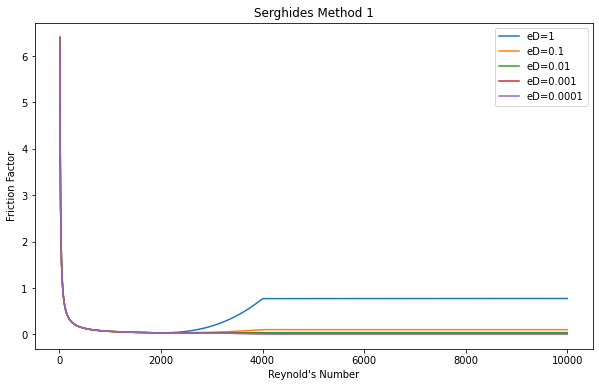

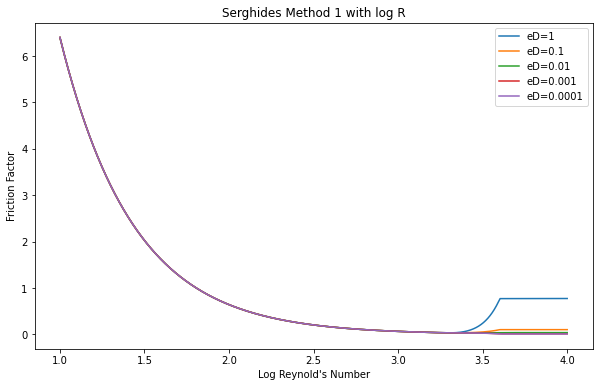

In [32]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 1')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 1 with log R')
plt.legend()
plt.show()
                      

In [33]:
def Serghides2(R,k,d):
    eD=k/d
    psi1=-2*np.log10(eD/3.7)+12/R
    psi2=-2*np.log10(eD/3.7)+(2.51*psi1)/R
    psi3=-2*np.log10(eD/3.7)+(2.51*psi2)/R
    f=(4.781-((psi2-4.781)**2)/(psi3-2*psi2+4.781))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Serghides2(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Serghides2(R,k,d)*((R > 4000))
        return f

In [34]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Serghides2',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
3.837339999881806e-05
0.00717980109527825


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


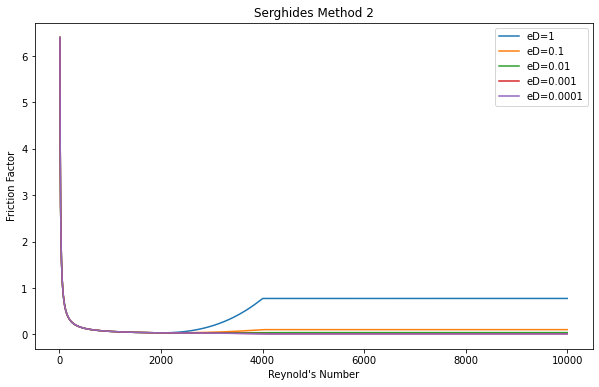

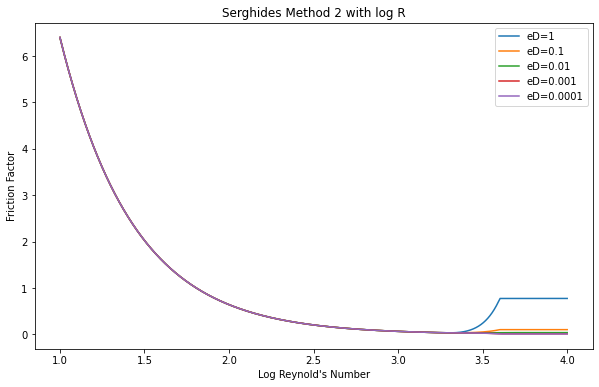

In [35]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 2')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 2 with log R')
plt.legend()
plt.show()
                      

In [36]:
def GoudarSonnad1(R,k,d):
    eD=k/d
    S=0.124*(R)*(eD)+np.log(0.4587*(R))
    T=(S/(S+1))
    F=0.8686*np.log((0.4587*(R))/((S-0.31)**T))
    f=1/(F*F)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=GoudarSonnad1(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+GoudarSonnad1(R,k,d)*((R > 4000))
        return f

In [37]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'GoudarSonnad1',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
4.341060000115249e-05
0.012156107635725843


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


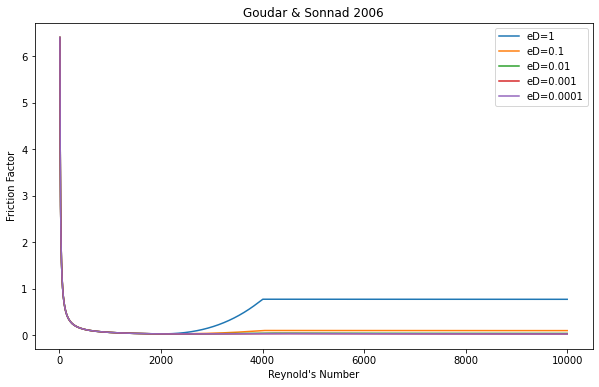

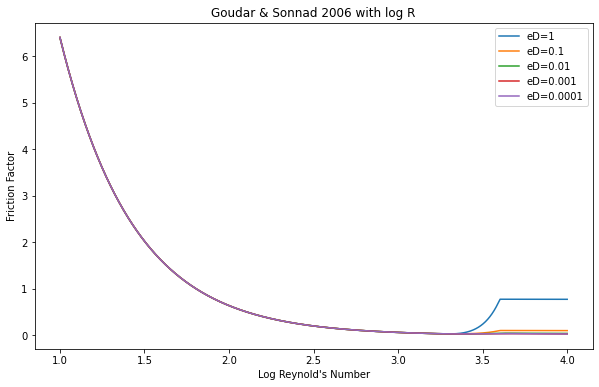

In [38]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1       

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2006')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2006 with log R')
plt.legend()
plt.show()
                      

In [39]:
def GoudarSonnad2(R,k,d):
    eD=k/d
    a=2/(np.log(10))
    b=eD/3.7
    da=np.log(10)*(R)/5.02
    s=b*da*np.log(da)
    q=s/(s**(s+1))
    g=b*da+np.log(d/q)
    z=np.log(q/g)
    dla=z*(g/(g+1)) 
    dcfa=dla*((1+((z/2)/((g+1)**2+(z/3)*(2*g-1)))))
    f=a-(np.log(da/q)+dcfa)
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=GoudarSonnad2(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+GoudarSonnad2(R,k,d)*((R > 4000))
        return f


In [40]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'GoudarSonnad2',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning

time
-2.4080000002868476e-07
0.027842734776678913


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning

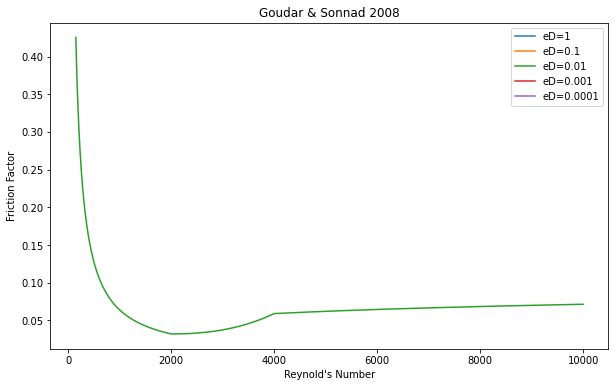

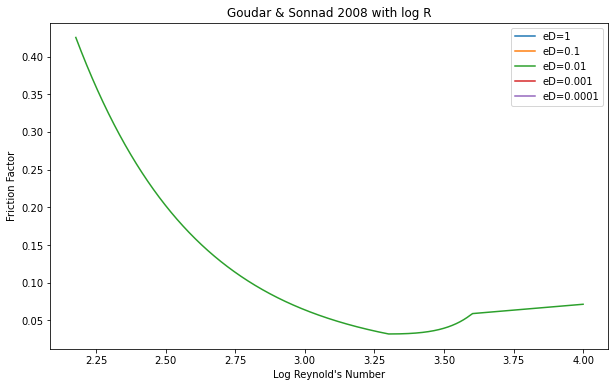

In [41]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2008')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2008 with log R')
plt.legend()
plt.show()
                      

In [42]:
def Blasius(R,k):
    f=0.316/(R**(1/4))*(k==0)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Blasius(X2,k)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Blasius(R,k)*((R > 4000))
        return f


In [43]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Blasius',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
4.111060000104772e-05
0.02183428266033432


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


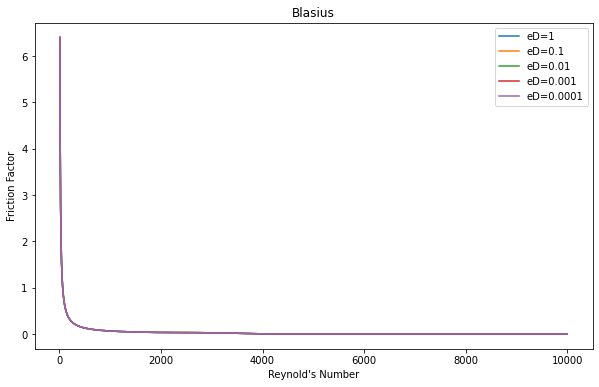

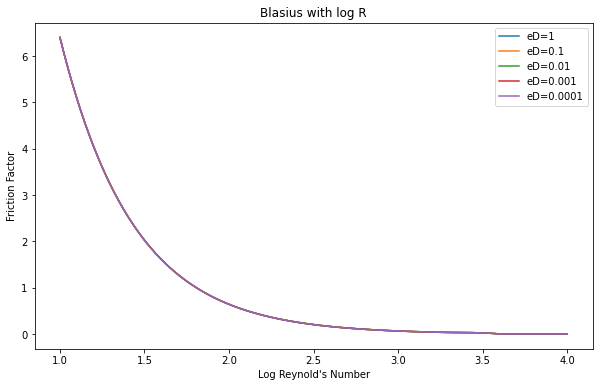

In [44]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
      

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Blasius')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Blasius with log R')
plt.legend()
plt.show()
                      

In [45]:
def haaland(R,k,d):
    eD=k/d
    f=-1.8*(np.log10(eD/3.7**1.11+69/R))
    f=1/(f*f)
    return f  


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=haaland(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+haaland(4000,k,d)*((R > 4000))
        return f


In [46]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Haaland',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
4.038799999943876e-05
0.057616627400844535


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


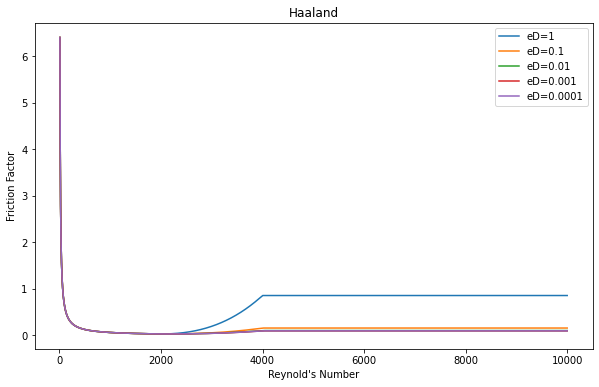

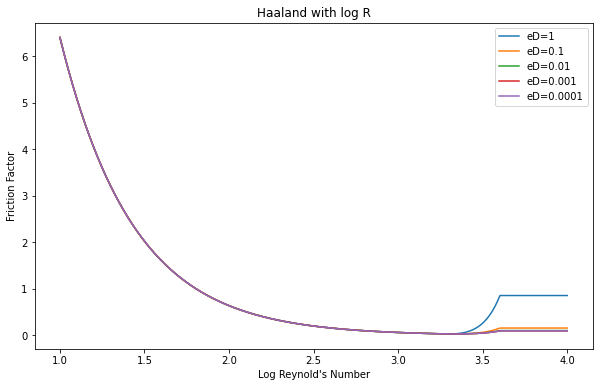

In [47]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Haaland')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Haaland with log R')
plt.legend()
plt.show()
                      

In [48]:
def Buzzelli(R,k,d):
    eD=k/d
    alpha=(0.744*np.log(R)-1.41)/(1+1.32*eD)
    beta=(R)*(eD/3.7)+2.51*alpha
    f=alpha-((alpha+2*np.log10(beta/(R)))/(1+2.18/beta))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Buzzelli(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Buzzelli(4000,k,d)*((R > 4000))
        return f


In [49]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Buzzelli',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
1.2461000005714595e-06
0.015025664352371307


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


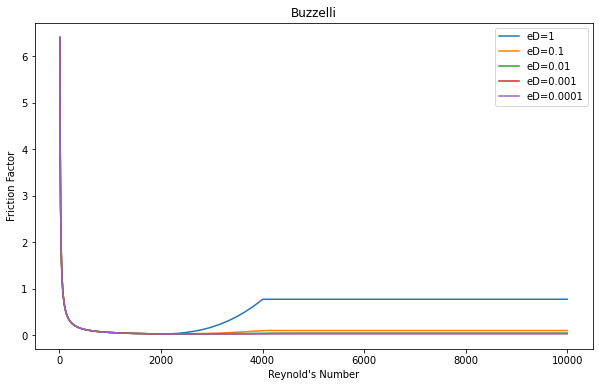

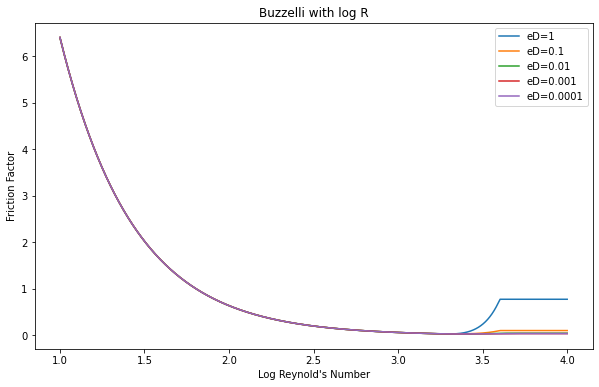

In [50]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Buzzelli')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Buzzelli with log R')
plt.legend()
plt.show()


In [51]:

def MonzonRomeoRoyo(R,k,d):
    eD=k/d
    f=-2*np.log10(eD/3.7)-(5.0272/(R))*np.log10(eD/3.827)*(4.657/(R))*np.log10(eD/(7.7918)**0.09924+(5.3326/(208.815+(R)))**0.9345)
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=MonzonRomeoRoyo(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+MonzonRomeoRoyo(4000,k,d)*((R > 4000))
        return f

In [52]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'MRR',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-5.3700001444667576e-08
0.007194890209875077


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


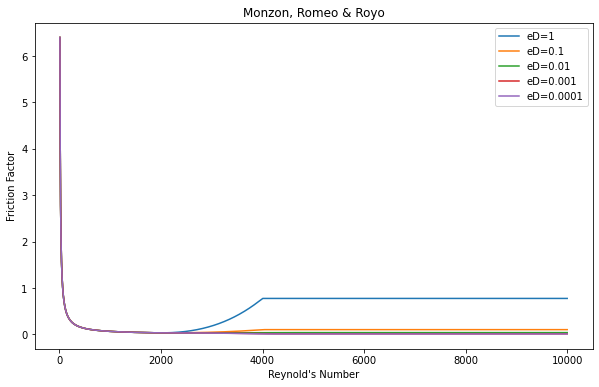

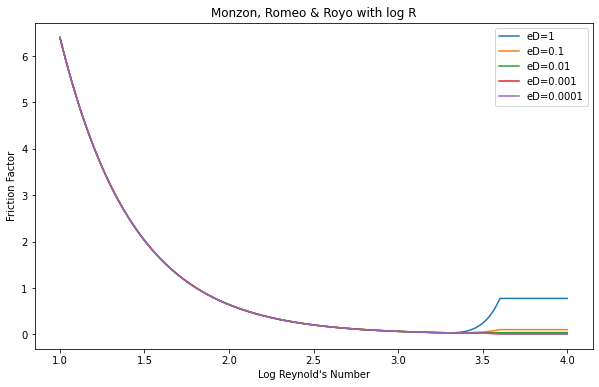

In [53]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Monzon, Romeo & Royo')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Monzon, Romeo & Royo with log R')
plt.legend()
plt.show()
                      

In [54]:

def moody(R,k,d):
    eD=k/d
    f=0.0055*(1+(2*(10**4)*(eD)+(10**6)/(R))**(1/3))
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=moody(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+moody(4000,k,d)*((R > 4000))
        return f

In [55]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Moody',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-3.2350999990740093e-06
0.01394511007908925


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


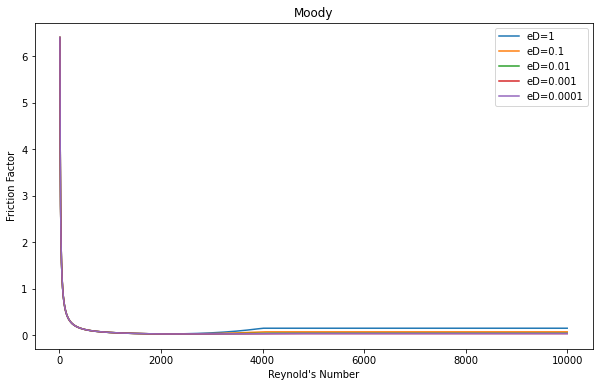

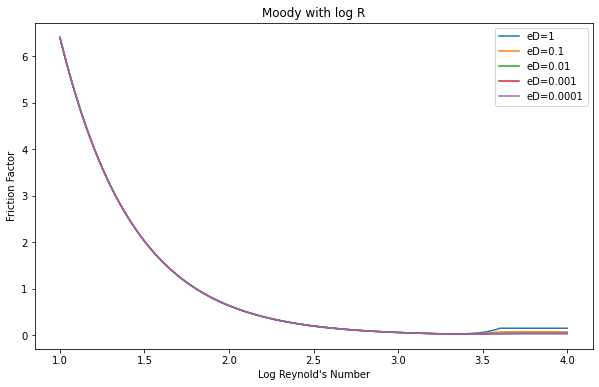

In [56]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Moody')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Moody with log R')
plt.legend()
plt.show()


In [57]:
def Vatankhan(R,k,d):
    eD=k/d
    S=0.124*(R)*(eD)+np.log10(0.4587*(R))
    f=0.8686*np.log10((0.4587*(R)/(S-0.31))**(S/(S+0.9633)))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Vatankhan(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Vatankhan(4000,k,d)*((R > 4000))
        return f

In [58]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Vatankhan',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)

time
4.181199999948149e-06
0.20020529215770946


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


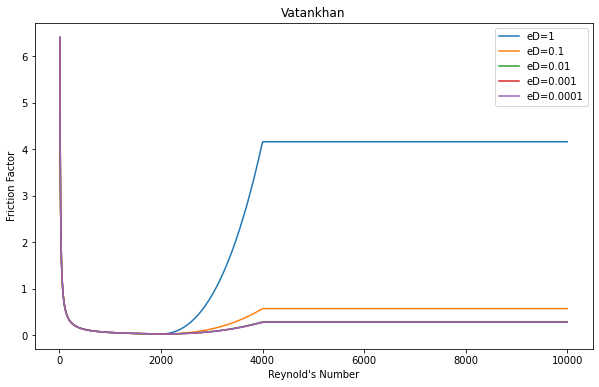

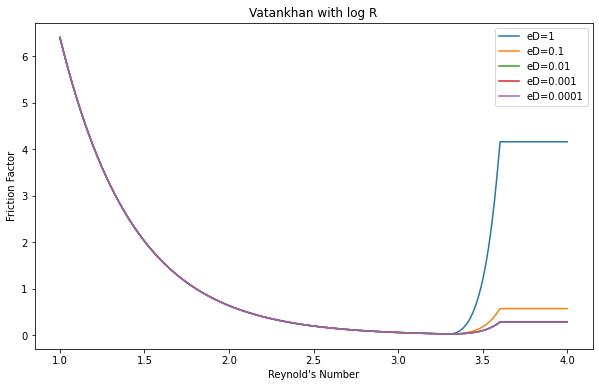

In [59]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Vatankhan')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Vatankhan with log R')
plt.legend()
plt.show()
                      

In [60]:
def EPT(R,k,d):
    eD=k/d
    f=(0.2479-0.0000947*(7-(np.log10(R)**4)/(np.log10(eD/3.615)+(7.366/(R**0.9142)))))
    return f
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=EPT(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+EPT(4000,k,d)*((R > 4000))
        return f

In [61]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'EPT',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
2.269759999944654e-05
0.15913579809533673


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


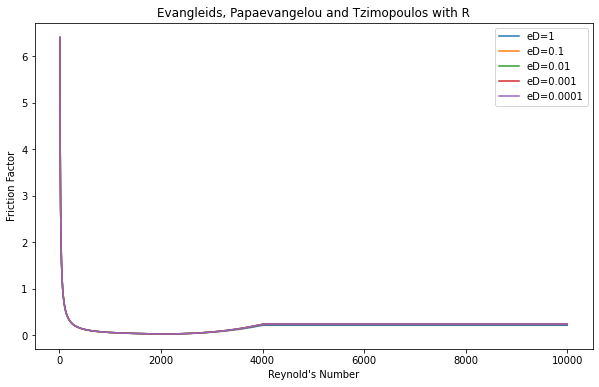

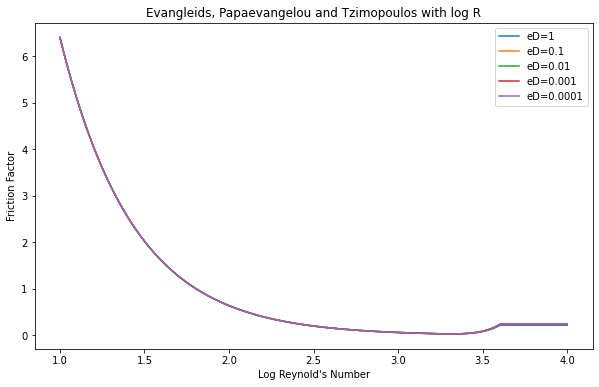

In [62]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Evangleids, Papaevangelou and Tzimopoulos with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Evangleids, Papaevangelou and Tzimopoulos with log R')
plt.legend()
plt.show()
                      

In [63]:
def RaoKumar(R,k,d):
    eD=k/d
    a=0.444
    b=0.135
    fRe=1-0.55*np.exp(-.33*(np.log(R/6.5))**2)
    B=((a+b*(R))/(R))*fRe
    f=2*np.log(eD/2*B)
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=RaoKumar(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+RaoKumar(4000,k,d)*((R > 4000))
        return f

In [64]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'RaoKumar',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
5.1146300000255e-05
0.01831143146857792


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


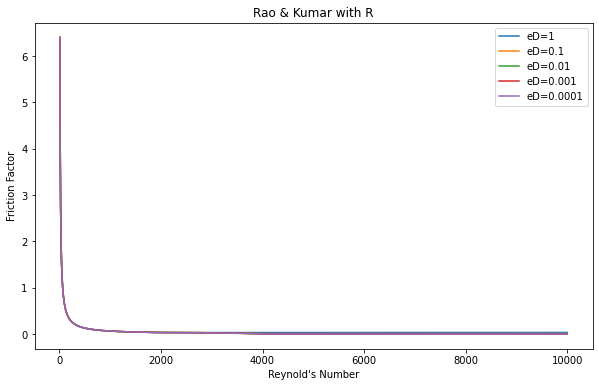

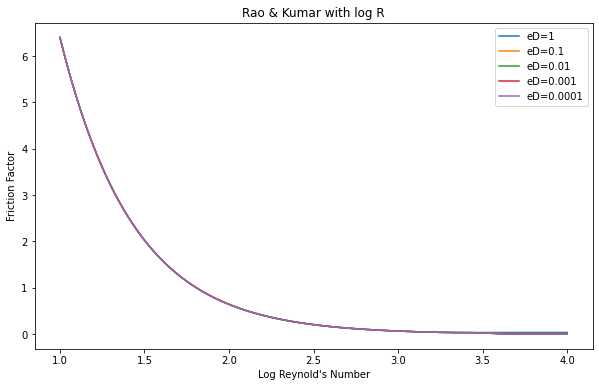

In [65]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Rao & Kumar with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Rao & Kumar with log R')
plt.legend()
plt.show()
                      

In [66]:

def Mandilli(R,k,d):
    eD=k/d
    p=2*np.log10(eD/3.7)+(95/(R**0.983))-(96.82/R)
    f=1/(p*p)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Mandilli(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Mandilli(4000,k,d)*((R > 4000))
        return f

In [67]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Mandilli',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
1.1027000018657417e-06
0.007222597541183109


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


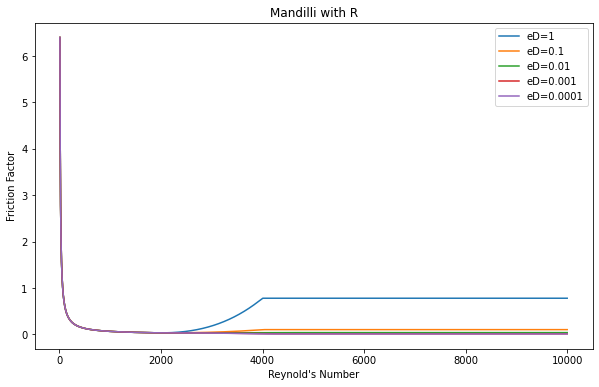

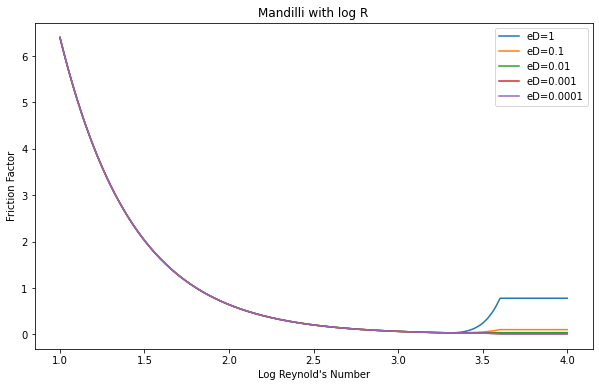

In [68]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Mandilli with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Mandilli with log R')
plt.legend()
plt.show()
                      

In [69]:
def nikuradse(R):
    f=0.0032+0.2211/((R)**0.237)
    return f
  
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=nikuradse(X2)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+nikuradse(4000)*((R > 4000))
        return f

In [70]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Nikuradse',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
8.147000007738825e-07
0.005168426612253593


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


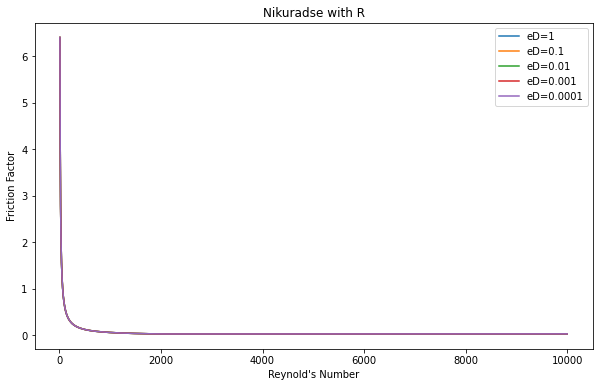

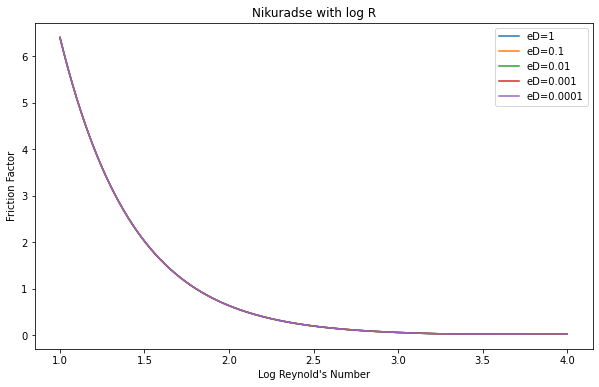

In [71]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Nikuradse with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Nikuradse with log R')
plt.legend()
plt.show()
                      

In [72]:

def ZigrangSylvester1(R,k,d):
    eD=k/d
    f=2*np.log10(eD/(3.7+(5.02/(R))*np.log10(eD/3.7)-(5.02/(R))*(np.log10(eD/(3.7)+13/(R)))))
    f=1/(f*f)
    return f
                                         
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=ZigrangSylvester1(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+ZigrangSylvester1(4000,k,d)*((R > 4000))
        return f

In [73]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'ZigrangSylvester1',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
4.215429999931075e-05
0.007195715314069234


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


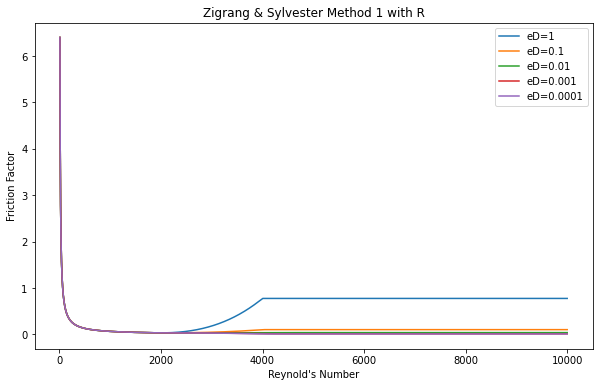

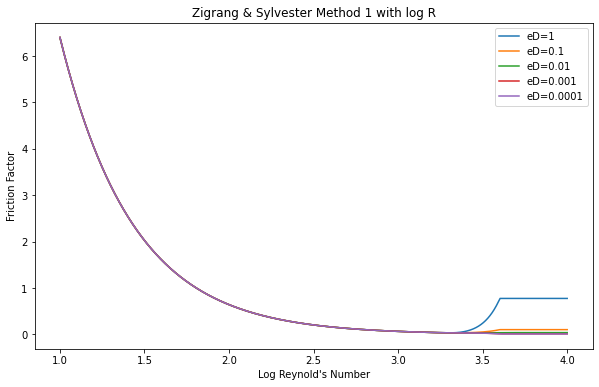

In [74]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 1 with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 1 with log R')
plt.legend()
plt.show()
                      


In [75]:
def ZigrangSylvester2(R,k,d):
    eD=k/d
    f=2*np.log(eD/3.7)+(5.02/R)*(np.log(eD/3.7)+13/R)
    f=1/(f*f)
    return f

                                         
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=ZigrangSylvester2(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+ZigrangSylvester2(4000,k,d)*((R > 4000))
        return f

In [76]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'ZigrangSylvester2',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-6.465399999797228e-06
0.016472576266650236


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


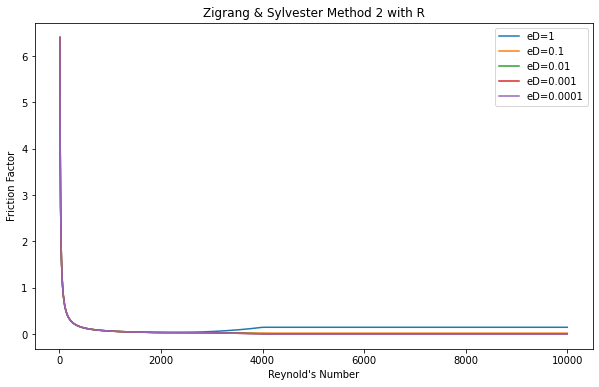

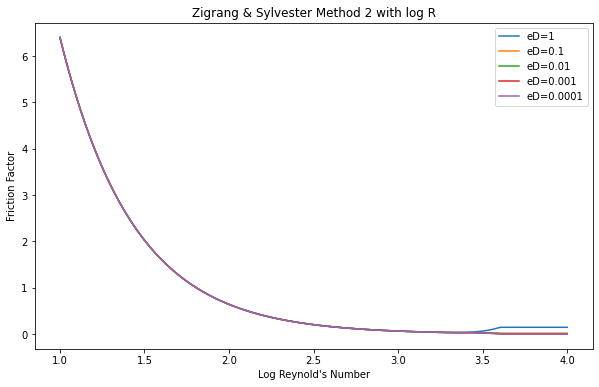

In [77]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 2 with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 2 with log R')
plt.legend()
plt.show()
                      

In [78]:
print(newDfObj)

               Method       RMS          Time
0             Laminar  0.000000  7.310000e-08
1             Laminar  0.000000  7.310000e-08
2          DP Clamond  0.000000  4.969400e-06
3         SP. Clamond  0.240529  4.454960e-05
4          Shifrinson  0.005471  3.880140e-05
5              Birkić  0.007153  4.734000e-07
6          JainSwamee  0.004565 -1.488000e-07
7          Serghides1  0.007181  7.550000e-08
8          Serghides2  0.007180  3.837340e-05
9       GoudarSonnad1  0.012156  4.341060e-05
10      GoudarSonnad2  0.027843 -2.408000e-07
11            Blasius  0.021834  4.111060e-05
12            Haaland  0.057617  4.038800e-05
13           Buzzelli  0.015026  1.246100e-06
14                MRR  0.007195 -5.370000e-08
15              Moody  0.013945 -3.235100e-06
16          Vatankhan  0.200205  4.181200e-06
17                EPT  0.159136  2.269760e-05
18           RaoKumar  0.018311  5.114630e-05
19           Mandilli  0.007223  1.102700e-06
20          Nikuradse  0.005168  8

In [79]:

newDfObj['-Log(abs[Time])'] = -1*np.log10(np.absolute(newDfObj.Time))
print(newDfObj)


               Method       RMS          Time  -Log(abs[Time])
0             Laminar  0.000000  7.310000e-08         7.136083
1             Laminar  0.000000  7.310000e-08         7.136083
2          DP Clamond  0.000000  4.969400e-06         5.303696
3         SP. Clamond  0.240529  4.454960e-05         4.351156
4          Shifrinson  0.005471  3.880140e-05         4.411153
5              Birkić  0.007153  4.734000e-07         6.324772
6          JainSwamee  0.004565 -1.488000e-07         6.827397
7          Serghides1  0.007181  7.550000e-08         7.122053
8          Serghides2  0.007180  3.837340e-05         4.415970
9       GoudarSonnad1  0.012156  4.341060e-05         4.362404
10      GoudarSonnad2  0.027843 -2.408000e-07         6.618344
11            Blasius  0.021834  4.111060e-05         4.386046
12            Haaland  0.057617  4.038800e-05         4.393748
13           Buzzelli  0.015026  1.246100e-06         5.904447
14                MRR  0.007195 -5.370000e-08         7

               Method       RMS          Time  -Log(abs[Time])
1             Laminar  0.000000  7.310000e-08         7.136083
2          DP Clamond  0.000000  4.969400e-06         5.303696
3         SP. Clamond  0.240529  4.454960e-05         4.351156
4          Shifrinson  0.005471  3.880140e-05         4.411153
5              Birkić  0.007153  4.734000e-07         6.324772
6          JainSwamee  0.004565 -1.488000e-07         6.827397
7          Serghides1  0.007181  7.550000e-08         7.122053
8          Serghides2  0.007180  3.837340e-05         4.415970
9       GoudarSonnad1  0.012156  4.341060e-05         4.362404
10      GoudarSonnad2  0.027843 -2.408000e-07         6.618344
11            Blasius  0.021834  4.111060e-05         4.386046
12            Haaland  0.057617  4.038800e-05         4.393748
13           Buzzelli  0.015026  1.246100e-06         5.904447
14                MRR  0.007195 -5.370000e-08         7.270026
15              Moody  0.013945 -3.235100e-06         5

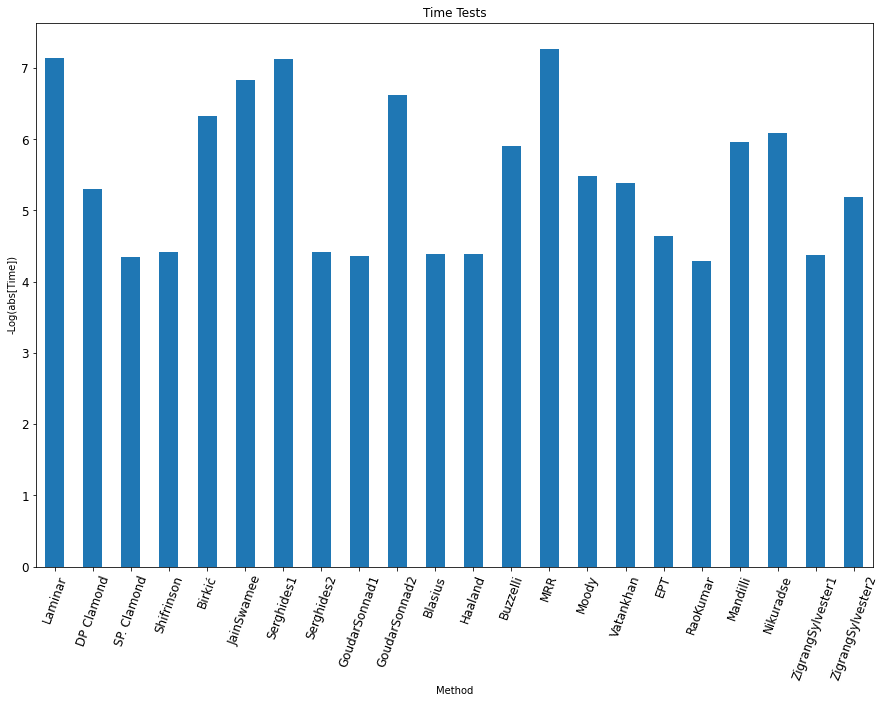

In [80]:
newdf2 = newDfObj.drop(index=0)
print(newdf2)
newdf2.plot.bar(x="Method", y="-Log(abs[Time])", rot=70, title="Time Tests", xlabel="Method", ylabel="-Log(abs[Time])", figsize=(15, 10), legend=False, fontsize=12)
plt.show()


In [81]:
newDfObj.to_csv(r'C:\Test3\MoreTests2.csv')

In [82]:
newDfObj2['(abs[Time])/(min[Time])'] = np.absolute(newDfObj.Time)/(np.minimum(np.absolute(newDfObj.Time)))
print(newDfObj2)

TypeError: ufunc() missing 1 of 2required positional argument(s)

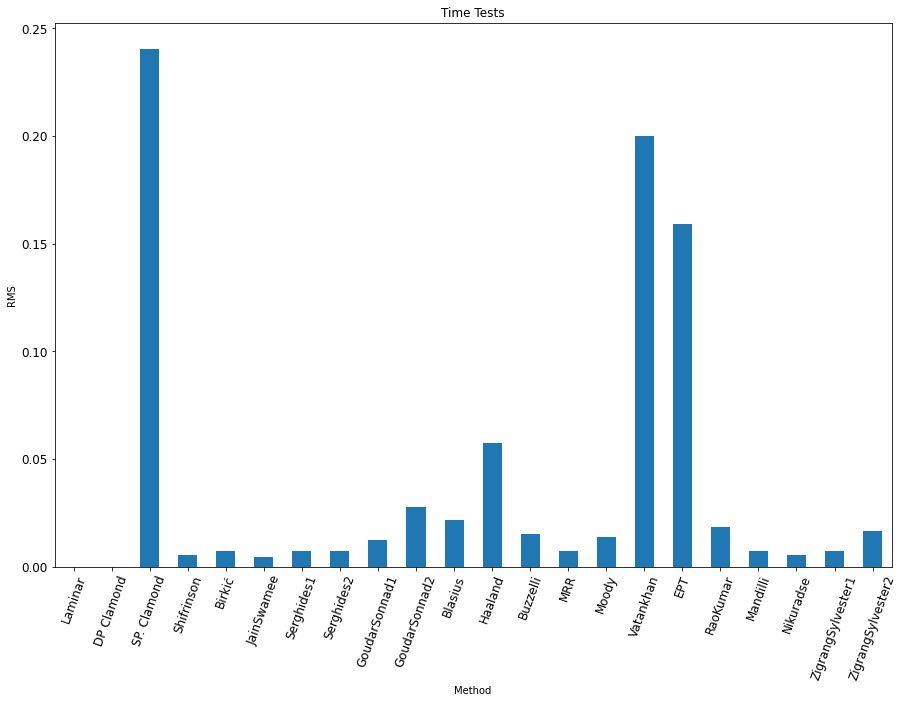

In [83]:
newdf2.plot.bar(x="Method", y="RMS", rot=70, title="Time Tests", xlabel="Method", ylabel="RMS", figsize=(15, 10), legend=False, fontsize=12)
plt.show()


# Dobromyslov Method

In [84]:
def Dobromyslov(R,k,d):
    eD=k/d
    Rekv=500*(eD)
    B=(1+(np.log10(R)/np.log10(Rekv)))
    b=B*(B <= 2)+2*(B > 2)
    V=np.log10(3.7*eD)
    f=(0.5/V)*((b/2+(1.312*(2-b)*V)/(np.log10(R)-1)))
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Dobromyslov(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Dobromyslov(R,k,d)*((R > 4000))
        return f

In [85]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Dobromyslov',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


time
-5.1070000008621715e-06
6.135899290885628


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


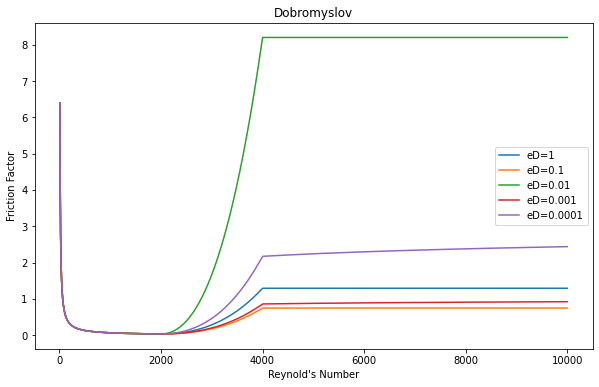

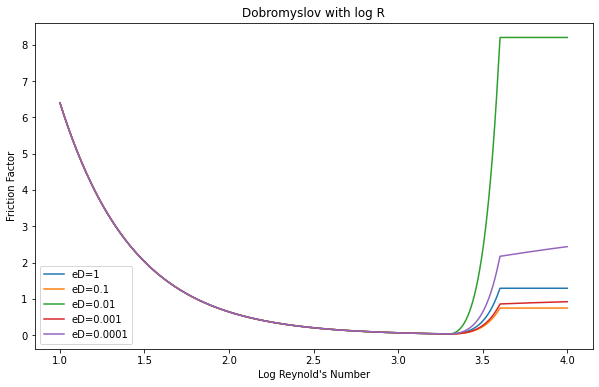

In [86]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
 

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Dobromyslov')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Dobromyslov with log R')
plt.legend()
plt.show()
 